In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
from sklearn.datasets import fetch_california_housing
housing_dataset = fetch_california_housing()

In [4]:
housing_pd = pd.DataFrame(housing_dataset.data)
housing_pd.columns = housing_dataset.feature_names
housing_pd_target = np.asarray(housing_dataset.target)
housing_pd['HP'] = pd.Series(housing_pd_target)

In [5]:
X = housing_pd.iloc[:, :-1]
y = housing_pd.iloc[:, -1]

In [6]:
housing_pd.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'HP'],
      dtype='object')

In [7]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HP          20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


1) Linear relationship

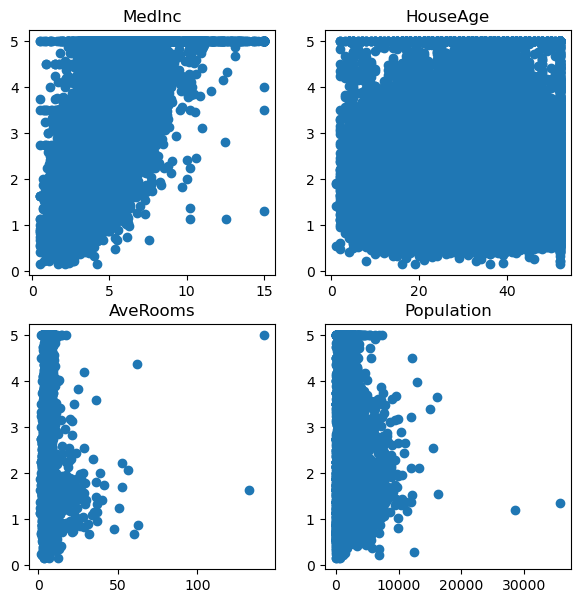

In [8]:
plt.rcParams["figure.figsize"] =(7,7)
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(housing_pd['MedInc'], housing_pd['HP'])
ax1.set_title("MedInc")
ax2.scatter(housing_pd['HouseAge'], housing_pd['HP'])
ax2.set_title("HouseAge")
ax3.scatter(housing_pd['AveRooms'], housing_pd['HP'])
ax3.set_title("AveRooms")
ax4.scatter(housing_pd['Population'], housing_pd['HP'])
ax4.set_title("Population")


plt.show()

This features do not seem to be having linear relationship with target.

2) NO multicollinearity

In [9]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
vif

,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


Features have very high VIF

<Axes: >

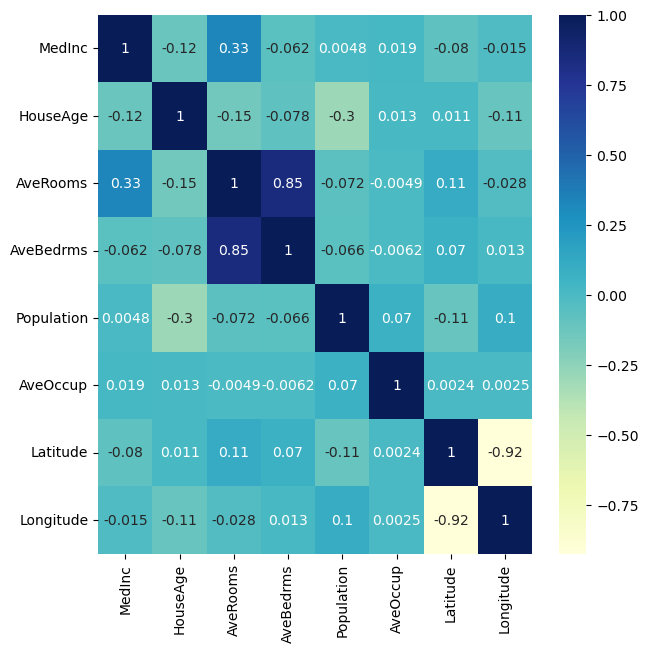

In [12]:
sns.heatmap(X.corr(),annot=True, cmap="YlGnBu")

In [13]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Get the positive correlated features
threshold = 0.8  # Define the threshold for correlation coefficient
positive_correlation = correlation_matrix[correlation_matrix > threshold]
positive_correlation = positive_correlation.where(positive_correlation < 1)


# Print the positively correlated features
print("Positively Correlated Features:")
print(positive_correlation.columns.tolist())

Positively Correlated Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

LinearRegression()

In [15]:
# Make predictions on the test data
y_pred = model.predict(X)

residuals = y_pred - y

3) Normality of residual

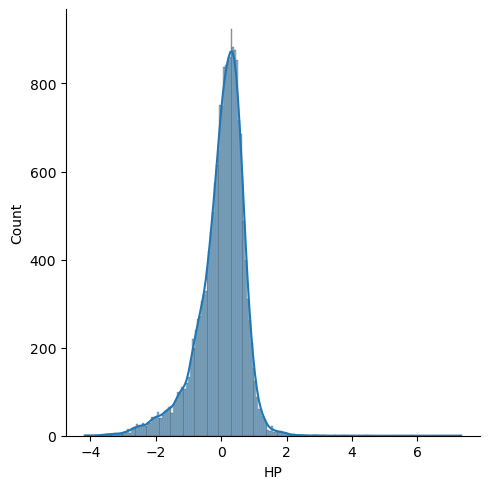

In [16]:
sns.displot(residuals, kde=True)

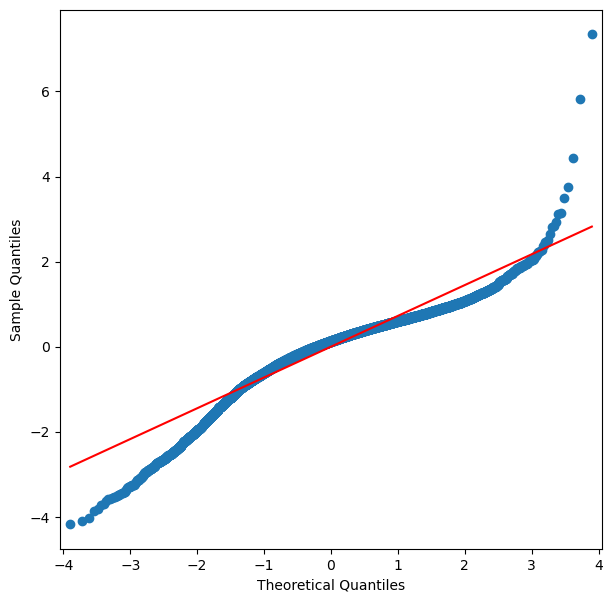

In [17]:
sm.qqplot(residuals, line='s')
plt.show(5,5)

It looks like normal distributed but it is not.

4) Homoscedasticity - constant variance

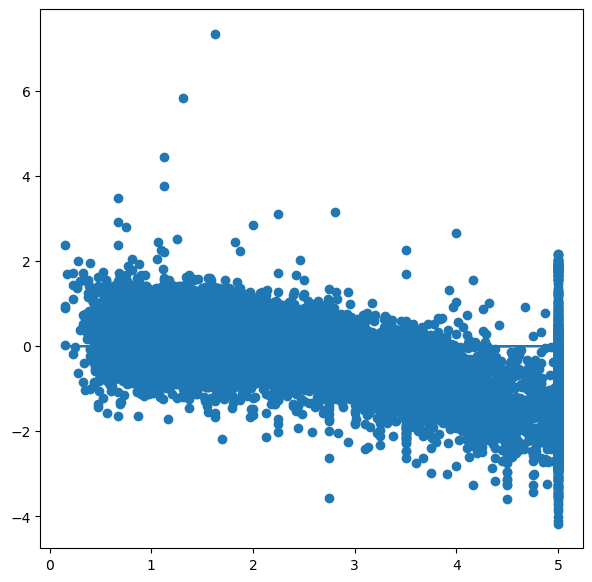

In [18]:
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

It does not look exactly like constant variance.

5) No Autocorrelation of Residuals

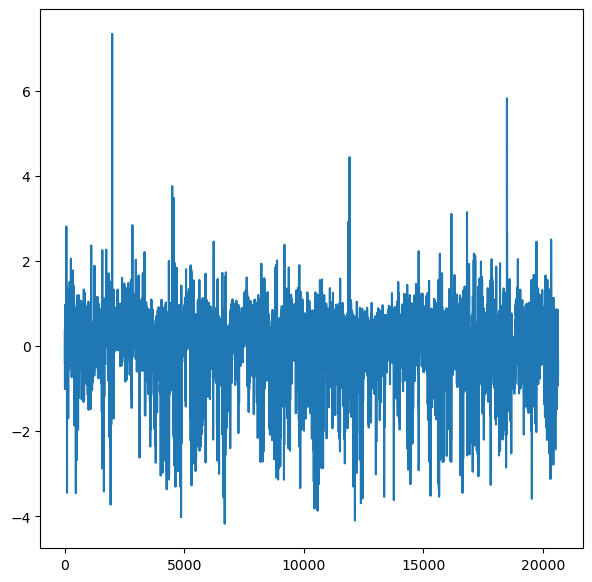

In [19]:
plt.plot(residuals.index,residuals)